In [2]:
import tweepy
import pandas as pd
import numpy as np

In [3]:
# Twitter App access keys for me

# Consume:
CONSUMER_KEY    = ''
CONSUMER_SECRET = ''

# Access:
ACCESS_TOKEN  = ''
ACCESS_SECRET = ''

In [4]:
# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [5]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

We need a 21st century MERIT-BASED immigration system.  Chain migration and the visa lottery are outdated programs… https://t.co/5SzmbuLXuY

Polling shows nearly 7 in 10 Americans support an immigration reform package that includes DACA, fully secures the… https://t.co/OD93mZebu7

My prayers and best wishes are with the family of Edwin Jackson, a wonderful young man whose life was so senselessly taken. @Colts

So disgraceful that a person illegally in our country killed @Colts linebacker Edwin Jackson. This is just one of m… https://t.co/r8vqtb4Tjb

Thanks to the historic TAX CUTS that I signed into law, your paychecks are going way UP, your taxes are going way D… https://t.co/DKVuox1qa6



In [6]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,We need a 21st century MERIT-BASED immigration...
1,Polling shows nearly 7 in 10 Americans support...
2,My prayers and best wishes are with the family...
3,So disgraceful that a person illegally in our ...
4,Thanks to the historic TAX CUTS that I signed ...
5,"Representative Devin Nunes, a man of tremendou..."
6,Any deal on DACA that does not include STRONG ...
7,"Little Adam Schiff, who is desperate to run fo..."
8,Thank you to @foxandfriends for exposing the t...
9,The Democrats are pushing for Universal Health...


In [7]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,We need a 21st century MERIT-BASED immigration...,139,960907362109452288,2018-02-06 16:05:42,Twitter for iPhone,56099,16406
1,Polling shows nearly 7 in 10 Americans support...,139,960906105982464000,2018-02-06 16:00:43,Twitter for iPhone,54154,15134
2,My prayers and best wishes are with the family...,130,960869939694505984,2018-02-06 13:37:00,Twitter for iPhone,74246,15748
3,So disgraceful that a person illegally in our ...,140,960868920428253184,2018-02-06 13:32:57,Twitter for iPhone,99724,26590
4,Thanks to the historic TAX CUTS that I signed ...,140,960614513224667136,2018-02-05 20:42:01,Twitter for iPhone,93429,20736
5,"Representative Devin Nunes, a man of tremendou...",140,960530665702912000,2018-02-05 15:08:51,Twitter for iPhone,123935,33716
6,Any deal on DACA that does not include STRONG ...,140,960522569492426753,2018-02-05 14:36:40,Twitter for iPhone,111781,28247
7,"Little Adam Schiff, who is desperate to run fo...",140,960492998734868480,2018-02-05 12:39:10,Twitter for iPhone,133394,41395
8,Thank you to @foxandfriends for exposing the t...,139,960487657691385856,2018-02-05 12:17:57,Twitter for iPhone,99680,21639
9,The Democrats are pushing for Universal Health...,140,960486144818450432,2018-02-05 12:11:56,Twitter for iPhone,110835,29074


In [8]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Somebody please inform Jay-Z that because of my policies, Black Unemployment has just been reported to be at the LOWEST RATE EVER RECORDED!
Number of likes: 240196
139 characters.

The tweet with more retweets is: 
Somebody please inform Jay-Z that because of my policies, Black Unemployment has just been reported to be at the LOWEST RATE EVER RECORDED!
Number of retweets: 64294
139 characters.



In [10]:
# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

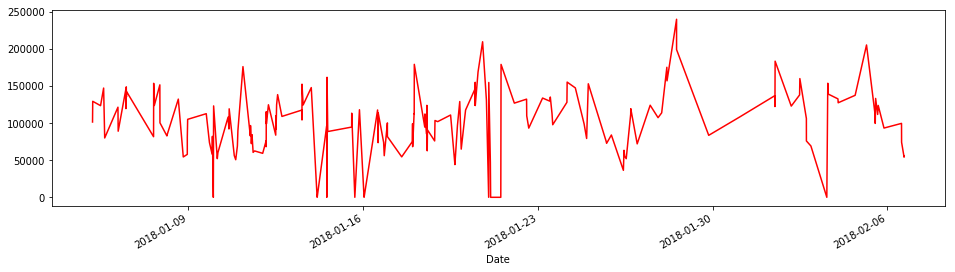

In [12]:
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
# Lenghts along time:
tfav.plot(figsize=(16,4), color='r');


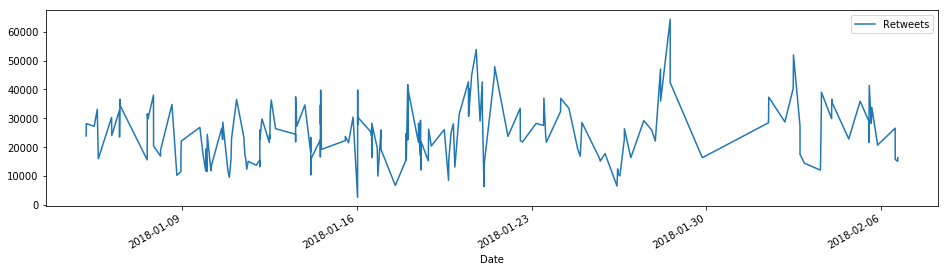

In [13]:
tret = pd.Series(data=data['RTs'].values, index=data['Date'])
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [14]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter for iPad
* Media Studio
* Twitter Web Client


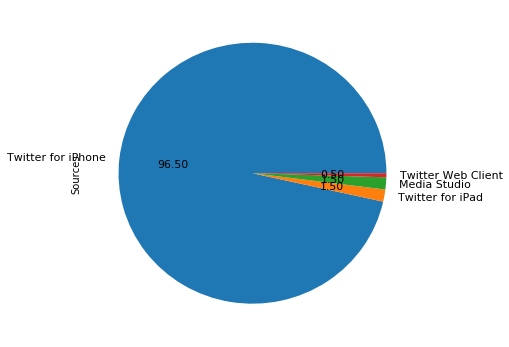

In [15]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));